DecisionTreeClassifier


In [ ]:
# import load_wine dataset, starter pack

In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = load_wine()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
X = df.data; y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=17)

In [ ]:
# first DTC

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc_model = dtc.fit(X_train, y_train)

In [ ]:
dtc_predictions = dtc.predict(X_test)

In [ ]:
accuracy = dtc.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
#  visualize decision tree using Graphviz

In [ ]:
from sklearn import tree
import graphviz

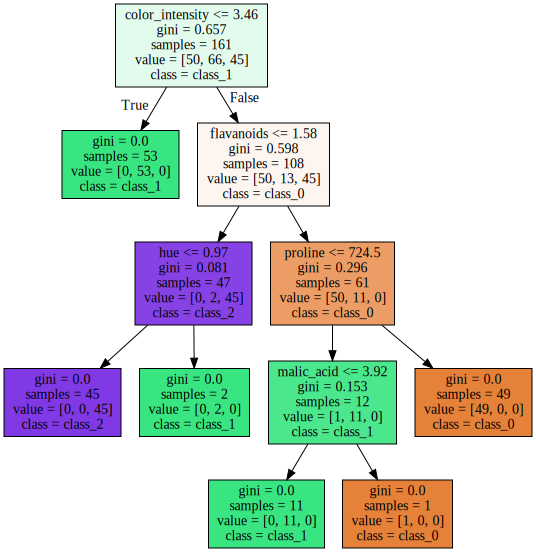

In [ ]:
def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=df.feature_names,  
                                    class_names=df.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_model)

In [ ]:
# hyperparameters tuning

In [ ]:
dtc_1 = DecisionTreeClassifier(max_features=2)

In [ ]:
dtc_1_model = dtc_1.fit(X_train, y_train)

In [ ]:
dtc_predictions = dtc.predict(X_test)

In [ ]:
accuracy = dtc.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9411764705882353


In [ ]:
# decision tree graph using Graphviz

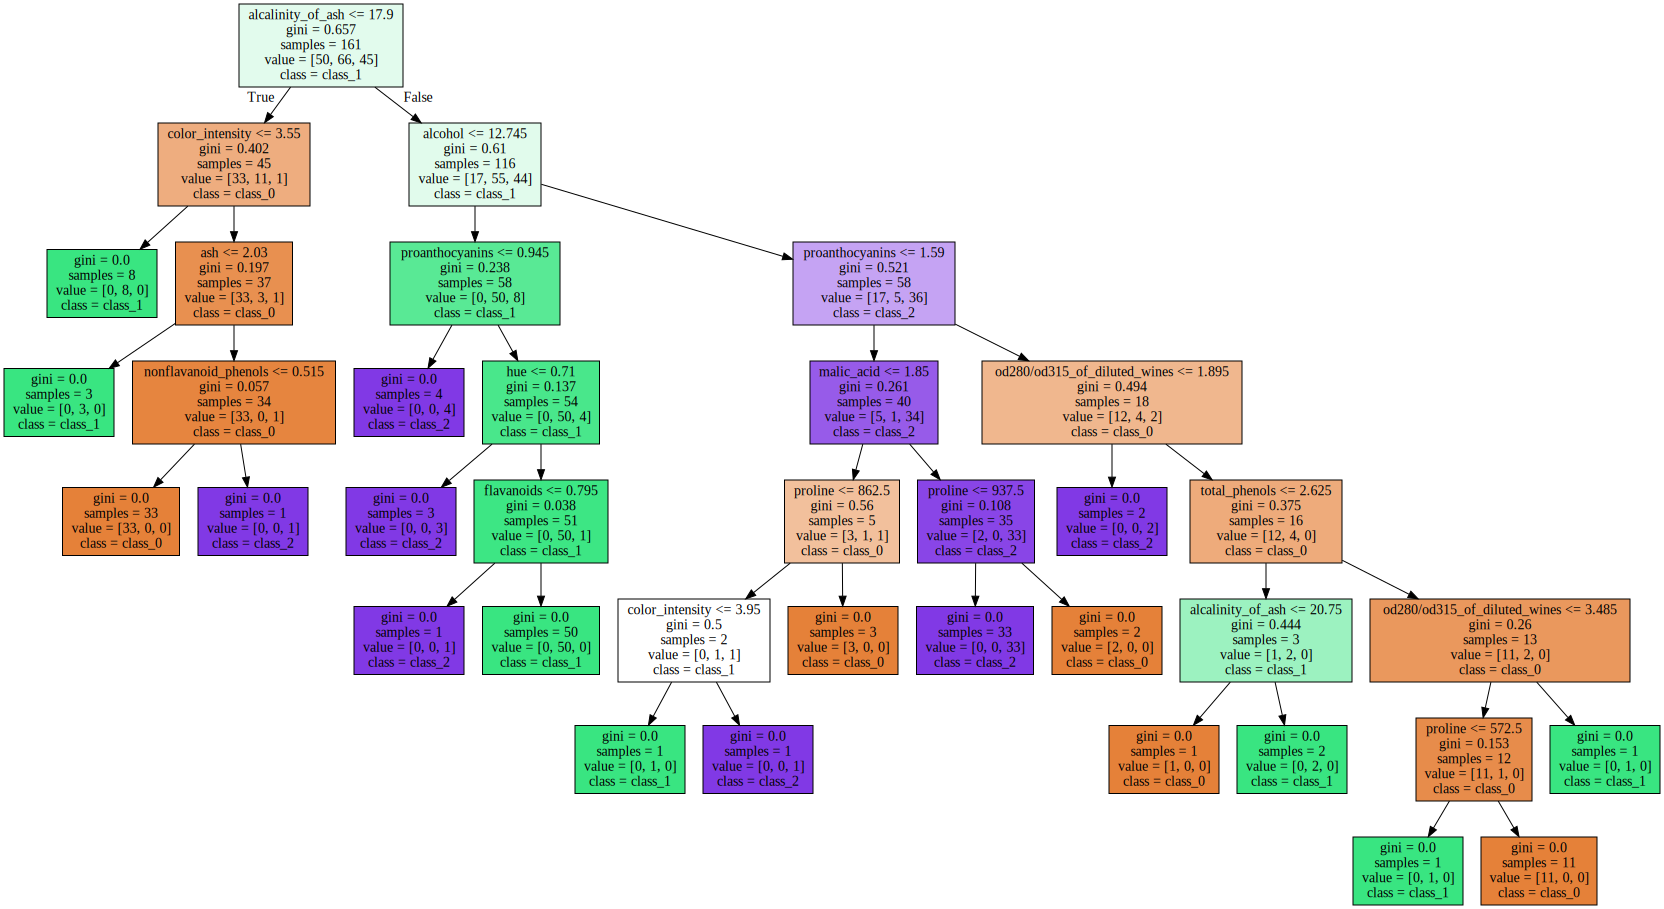

In [ ]:
def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=df.feature_names,  
                                    class_names=df.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_1_model)

The model works more accurately than without tuning hyperparameters, but from the graph you can see that the depth of the tree has increased, while there is only one object in several sheets, the tree could lose some generalizing ability on the test dataset.

In [ ]:
# tree with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

tree = dtc_1
tree_grid = GridSearchCV(tree, tree_params, cv=5)

### 7.
Create train model with tree_grid.fit() and find best parameter combination tree_grid.best_params_.

In [ ]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 6),
                         'max_

In [ ]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 6}

Pridiction on X_test and tree_grid.best_params_

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predicted = tree_grid.predict(X_test)


In [ ]:
accuracy = tree_grid.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
